In pypvcell, spectrum is a data structure that handles a set of wavelengths/frequencies and its corresponding content, such as the Sun's illumination spectrum or quantum efficiencies. Although this data could be handled with numpy's ndarray, however, we often have to deal with data with different wavelength units. Just using numpy's array to do this is very error prone. Let's start from example:

In [1]:
%matplotlib inline
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt

Set up a spectrum

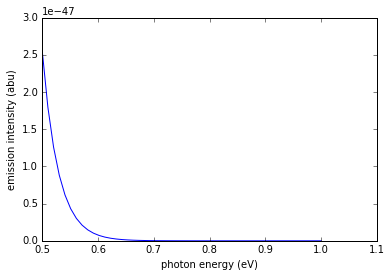

In [2]:
# wavelength
pe=np.linspace(0.5,1)
# set up a Planck-like spectrum
pk_spec=np.power(pe*sc.e,2)/np.exp(pe*sc.e/(sc.k*300))

plt.plot(pe,pk_spec)
plt.xlabel("photon energy (eV)")
plt.ylabel("emission intensity (abu)")

To convert the unit of wavelength from eV to nanometers, this is what we typically do:

In [3]:
wl=1240/pe #wavelength in nm

Often we want the wavelength array in ascending order, we then need to rearrange both arrays

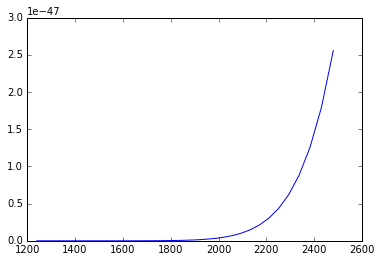

In [4]:
sorted_idx=wl.argsort()
wl=wl[sorted_idx]
pk_spec=pk_spec[sorted_idx]
plt.plot(wl,pk_spec)

This process can cause some problem, for example, we have to bookkeep the unit of the wavelengths and keep thinking whether the order is reversed. Handling these issues is what the class ```Spectrum``` was built for.

## Handling spectrum in ```Spectrum``` way
### Convert dimensionless spectrum

In [5]:
from spectrum_base_update import Spectrum

Continuing with the previous example, we first set up a ```Spectrum``` instance by inputting the arrays in the previous example.

In [6]:
demo_sp=Spectrum(wl,pk_spec,wavelength_unit="nm")

When we need to access the values of the array, we have to do this by telling the ```Spectrum``` class what unit we want:

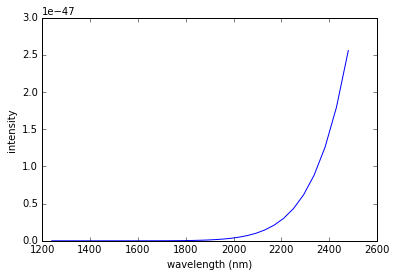

In [9]:
# output the spectrum with 'nm' as the wavelength
wl,sp=demo_sp.get_spectrum('nm')
plt.plot(wl,sp)
plt.xlabel("wavelength (nm)")
plt.ylabel("intensity")

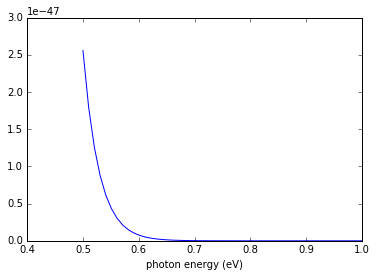

In [10]:
# output the spectrum with 'eV' as the wavelength
wl,sp=demo_sp.get_spectrum('eV')
plt.plot(wl,sp)
plt.xlabel("photon energy (eV)")
plt.ylabel("intensity (abu)")

In the above example, the wavelength array was resorted after converted from 'nm' to 'eV'.

### Converting the spectrum with demision /\[Area\]\[wavelength\]


Often we have to deal with spectrum data with dimsions, such as Sun's illumination spectrum. For example, (show a one-sun spectrum). It causes more headache to convert the spectrum from $/\mbox{m}^2\cdot \mbox{nm}$ to $/\mbox{cm}^2\cdot \mbox{eV}$